#**PROJECT AKHIR PRAKTIKUM DATA SCIENCE | IF-H**
---
**Anggota Kelompok:**
1. Tegar Hartoto Rahmatulloh (2210512017)
2. Samuel Halomoan Sihombing (2210512089)
3. Danendra Satya P (2210512123)

# IMPORT LIBRARY DAN DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
file_path = 'DatasetPrakData.csv'
data = pd.read_csv(file_path)

data.head()

,ONS code,Local authority area,Region,2009/10: Thousands of households 2006 mid-year estimate,2009/10: Numbers accepted as homeless and in priority need who are White,2009/10: Numbers accepted as homeless and in priority need who are Black or Black British,2009/10: Numbers accepted as homeless and in priority need who are Asian or Asian British,2009/10: Numbers accepted as homeless and in priority need who are Mixed,2009/10: Numbers accepted as homeless and in priority need who are Other ethnic origin,2009/10: Numbers accepted as homeless and in priority need who are Ethnic Group not Stated,...,2017/18: Total decisions where eligible but not homeless,2017/18: Total homelessness decisions,31 March 2018: Total households in B&B (including shared annex),31 March 2018: Total households in hostels,31 March 2018: Total households in LA/HA stock,31 March 2018: Total households in private sector leased (by LA or HA),31 March 2018: Total households in other temp (including private landlord),31 March 2018: Total households in temporary accommodation,31 March 2018: Number in temp per 1000 households,2017/18: Duty owed but no accommodation has been secured at end of March 2018
0,E92000001,ENGLAND,England,21515,27250,5600,2620,1160,1550,1850,...,25680,109410,5940,5460,15710,25280,27490,79880,3.4,10000
1,E07000223,Adur,SE,26,69,1,1,0,0,0,...,12,67,-,-,-,20,32,62,2.17,-
2,E07000026,Allerdale,NW,41,99,0,0,0,0,3,...,31,106,-,-,-,-,-,6,0.14,-
3,E07000032,Amber Valley,EM,52,30,0,0,0,0,0,...,87,240,-,-,8,-,-,12,0.22,-
4,E07000224,Arun,SE,66,50,0,0,0,1,1,...,430,738,-,32,28,-,44,128,1.79,87


# EKSPLORASI DAN CLEANING DATA

In [17]:
data_info = {
    "Shape": data.shape,
    "Columns": data.columns.tolist(),
    "Missing Values": data.isnull().sum().sum(),
    "Sample Data": data.sample(5)
}

data_info

{'Shape': (327, 192),
 'Columns': ['ONS code',
  'Local authority area',
  'Region',
  '2009/10: Thousands of households 2006 mid-year estimate',
  '2009/10: Numbers accepted as homeless and in priority need who are White',
  '2009/10: Numbers accepted as homeless and in priority need who are Black or Black British',
  '2009/10: Numbers accepted as homeless and in priority need who are Asian or Asian British',
  '2009/10: Numbers accepted as homeless and in priority need who are Mixed',
  '2009/10: Numbers accepted as homeless and in priority need who are Other ethnic origin',
  '2009/10: Numbers accepted as homeless and in priority need who are Ethnic Group not Stated',
  '2009/10: Numbers accepted as homeless and in priority need total',
  '2009/10: Number accepted per 1000 households',
  '2009/10: Total decisions where eligible homeless & in priority need but intentionally',
  '2009/10: Total decisions where eligible & homeless but not in priority need',
  '2009/10: Total decisions 

In [18]:
data.replace("-", np.nan, inplace=True)

data = data.apply(pd.to_numeric, errors='ignore')

trend_columns = [
    'Region',
    '2017/18: Total homelessness decisions',
    '2016/17: Total homelessness decisions',
    '2015/16: Total homelessness decisions',
    '2014/15: Total homelessness decisions',
    '2013/14: Total homelessness decisions',
    '2012/13: Total homelessness decisions',
    '2011/12: Total homelessness decisions',
    '2010/11: Total homelessness decisions'
]

trend_data = data[trend_columns].copy()

trend_data.info()
trend_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Region                                 327 non-null    object 
 1   2017/18: Total homelessness decisions  326 non-null    float64
 2   2016/17: Total homelessness decisions  326 non-null    float64
 3   2015/16: Total homelessness decisions  326 non-null    float64
 4   2014/15: Total homelessness decisions  327 non-null    int64  
 5   2013/14: Total homelessness decisions  327 non-null    int64  
 6   2012/13: Total homelessness decisions  327 non-null    int64  
 7   2011/12: Total homelessness decisions  327 non-null    int64  
 8   2010/11: Total homelessness decisions  327 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 23.1+ KB


<ipython-input-18-1abaec199d36>:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


,Region,2017/18: Total homelessness decisions,2016/17: Total homelessness decisions,2015/16: Total homelessness decisions,2014/15: Total homelessness decisions,2013/14: Total homelessness decisions,2012/13: Total homelessness decisions,2011/12: Total homelessness decisions,2010/11: Total homelessness decisions
0,England,109410.0,115590.0,114770.0,112330,111610,113520,108720,102200
1,SE,67.0,80.0,32.0,18,27,54,80,138
2,NW,106.0,85.0,120.0,98,107,129,220,334
3,EM,240.0,315.0,352.0,450,227,242,216,134
4,SE,738.0,771.0,782.0,497,224,283,220,196


# TREN TUNAWISMA DI INGGRIS

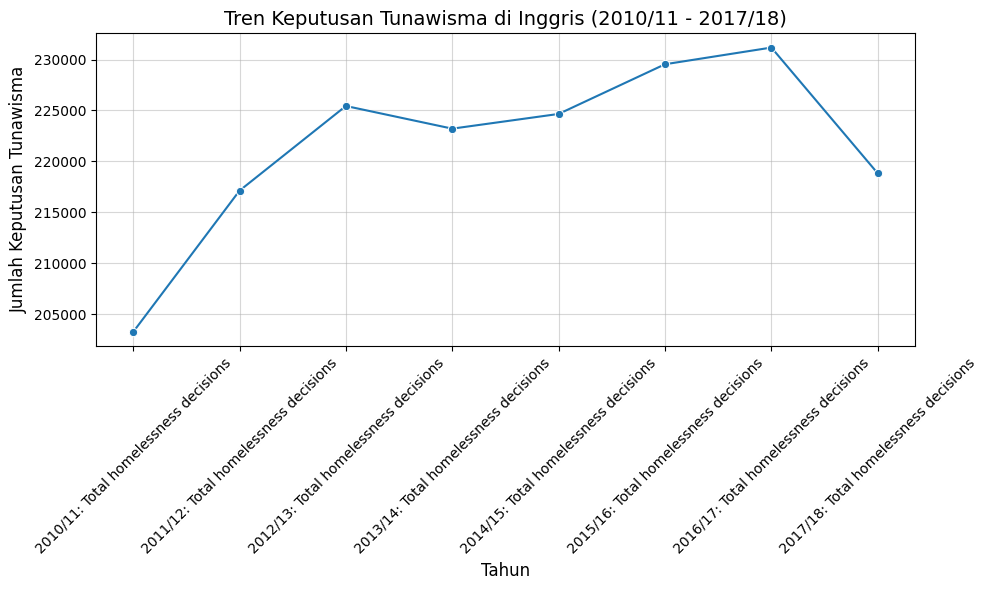

In [19]:
trend_yearly = trend_data.drop(columns=['Region']).sum().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=trend_yearly.index, y=trend_yearly.values, marker="o")

plt.title("Tren Keputusan Tunawisma di Inggris (2010/11 - 2017/18)", fontsize=14)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Jumlah Keputusan Tunawisma", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


# TREN TUNAWISMA PER WILAYAH

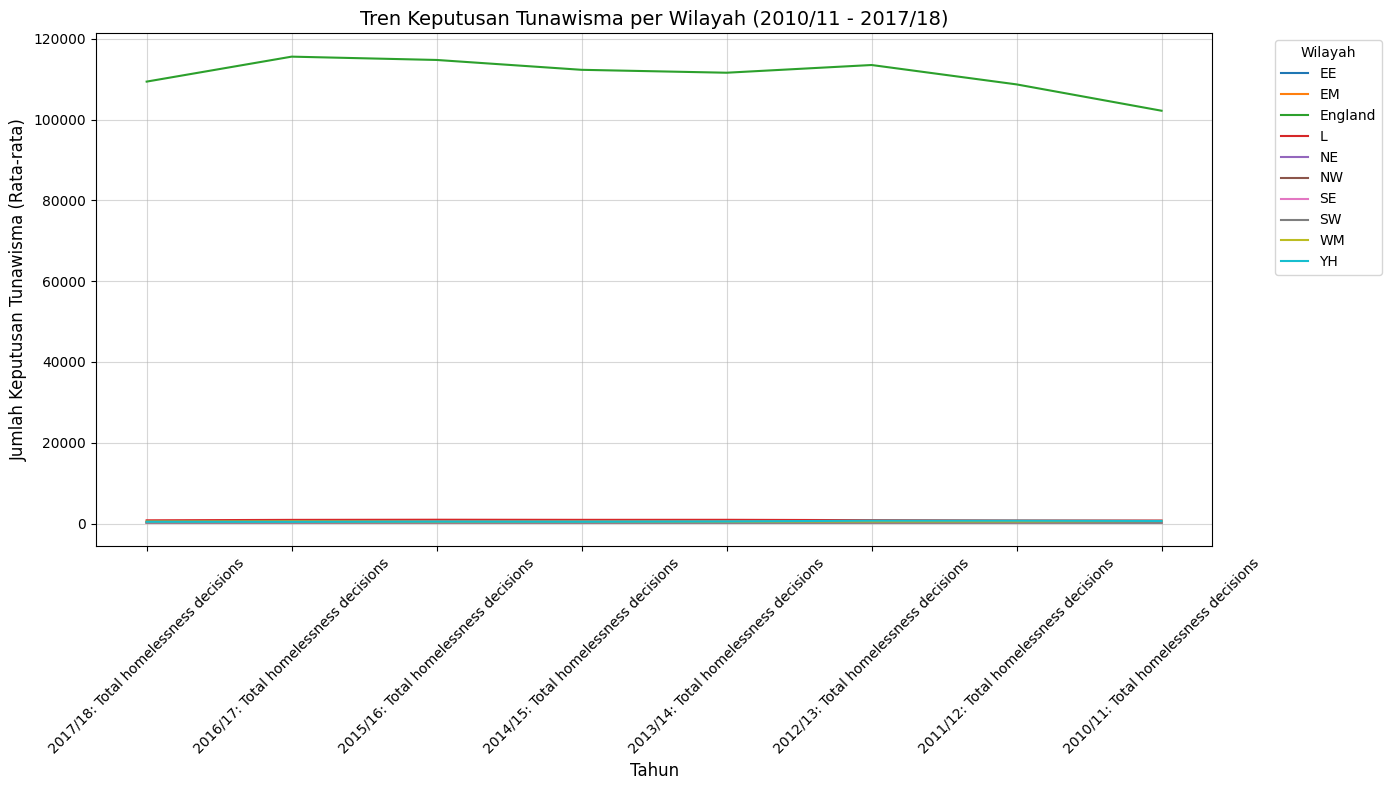

In [20]:
region_trend = trend_data.groupby("Region").mean().T

plt.figure(figsize=(14, 8))
for region in region_trend.columns:
    sns.lineplot(x=region_trend.index, y=region_trend[region], label=region)

plt.title("Tren Keputusan Tunawisma per Wilayah (2010/11 - 2017/18)", fontsize=14)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Jumlah Keputusan Tunawisma (Rata-rata)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Wilayah", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


# MODEL PREDIKSI DENGAN REGRESI LINIER DAN RANDOM FOREST

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

trend_data_melted = trend_data.melt(id_vars=["Region"], var_name="Year", value_name="Decisions")
trend_data_melted["Year"] = trend_data_melted["Year"].str.extract(r"(\d{4})").astype(int)  # Extract the year

national_data = trend_data_melted[trend_data_melted["Region"] == "England"]
X = national_data["Year"].values.reshape(-1, 1)  # Feature: Year
y = national_data["Decisions"].values           # Target: Homelessness Decisions

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

{
    "Linear Regression": {"MSE": linear_mse, "R2": linear_r2},
    "Random Forest": {"MSE": rf_mse, "R2": rf_r2}
}


{'Linear Regression': {'MSE': 17231034.39999994, 'R2': -15.085354990781525},
 'Random Forest': {'MSE': 13248479.464999996, 'R2': -11.367597344162053}}

# PERBANDINGAN DATA AKTUAL DENGAN REGRESI LINIER DAN RANDOM FOREST

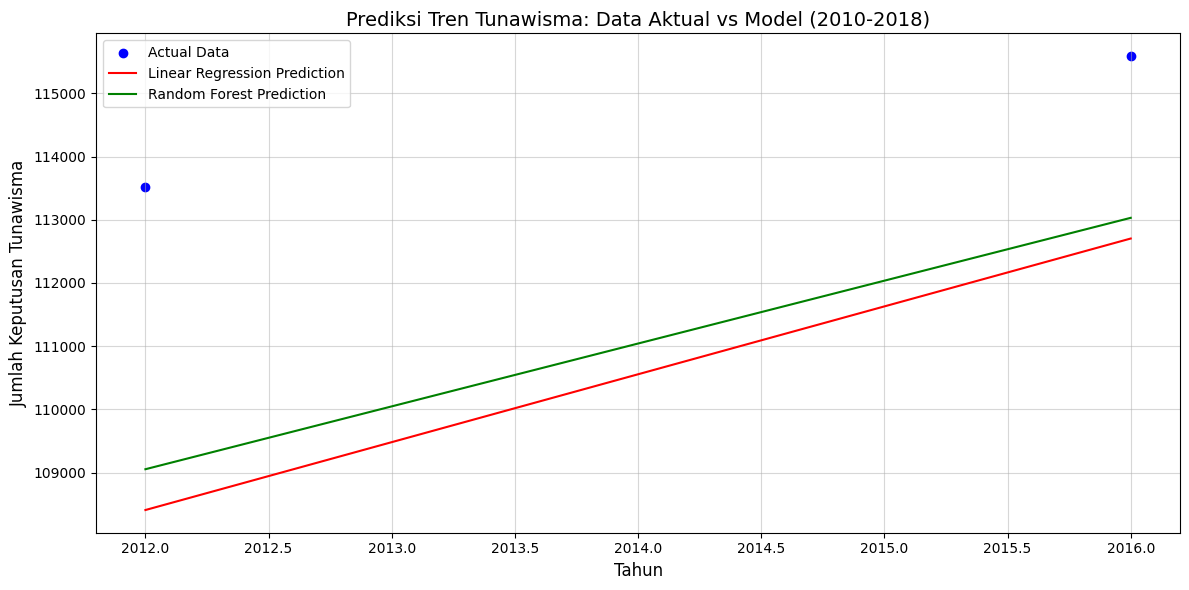

In [22]:
sorted_idx = np.argsort(X_test.flatten())
X_test_sorted = X_test[sorted_idx]
y_test_sorted = y_test[sorted_idx]
y_pred_linear_sorted = y_pred_linear[sorted_idx]
y_pred_rf_sorted = y_pred_rf[sorted_idx]

plt.figure(figsize=(12, 6))

plt.scatter(X_test, y_test, color="blue", label="Actual Data")

plt.plot(X_test_sorted, y_pred_linear_sorted, color="red", label="Linear Regression Prediction")
plt.plot(X_test_sorted, y_pred_rf_sorted, color="green", label="Random Forest Prediction")

plt.title("Prediksi Tren Tunawisma: Data Aktual vs Model (2010-2018)", fontsize=14)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Jumlah Keputusan Tunawisma", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


# K-FOLD CROSS VALIDATION

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

linear_cv_scores = cross_val_score(linear_model, X, y, cv=kf, scoring='r2')
linear_cv_mse = cross_val_score(linear_model, X, y, cv=kf, scoring='neg_mean_squared_error')

rf_cv_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='r2')
rf_cv_mse = cross_val_score(rf_model, X, y, cv=kf, scoring='neg_mean_squared_error')

kfold_results = {
    "Linear Regression": {
        "R2 Mean": np.mean(linear_cv_scores),
        "MSE Mean": -np.mean(linear_cv_mse)
    },
    "Random Forest": {
        "R2 Mean": np.mean(rf_cv_scores),
        "MSE Mean": -np.mean(rf_cv_mse)
    }
}

kfold_results


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


{'Linear Regression': {'R2 Mean': nan, 'MSE Mean': 14412587.27622574},
 'Random Forest': {'R2 Mean': nan, 'MSE Mean': 13757343.36500001}}